# Ames Housing Price Prediction: Model Evaluation and Analysis

**MATH-8710: Introduction to Machine Learning I**  
*Clemson University*

---

## Overview

This assignment focuses on practical model evaluation using real-world data. You will work with the Ames housing dataset to compare regression models and understand the practical implications of different modeling approaches through empirical analysis. This notebook reflects the type of work that a data scientist or machine learning engineer might perform in an industry setting.

## Learning Objectives

By completing this assignment, you will be able to:

1. **Load and preprocess** real-world datasets for machine learning analysis
2. **Apply cross-validation** to compare different regression models systematically
3. **Compute confidence intervals** for model performance metrics
4. **Interpret results** in terms of bias-variance tradeoff and practical considerations

---

## Dataset Information

### Ames Housing Price Dataset

The [Ames housing dataset](https://www.openml.org/search?type=data&status=active&id=42165) contains information about residential properties in Ames, Iowa, including:
- **Target variable**: Sale price of houses
- **Features**: 79 explanatory variables describing various aspects of residential homes
- **Size**: 1,460 houses with complete information
- **Source**: Compiled by Dean De Cock for use in data science education

This dataset is commonly used as a more modern and comprehensive alternative to the Boston Housing dataset, providing rich opportunities for exploring feature engineering and model comparison.

---

## Assignment Structure

- **Part 1: Data Loading and Exploration** (30 points)
- **Part 2: Cross-Validation Model Comparison** (70 points)  

**Total Points: 100**

---

In [122]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

# Configure plotting
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12
})

## Part 1: Data Loading and Exploration (30 points)

**Overview:** In this part, you will explore the Ames housing dataset by creating visualizations, analyzing statistical distributions, and preparing the data for machine learning models. The dataset has already been loaded for you below.

**Tasks:**
- **Part 1a:** Create distribution visualizations (10 points)
- **Part 1b:** Analyze statistical properties (10 points)  
- **Part 1c:** Preprocess data for modeling (10 points)

In [123]:
# --------------------------------
# DATA LOADING (PROVIDED) - No student action required
# --------------------------------

# Load the Ames housing dataset
print("Loading Ames housing dataset...")
ames = fetch_openml(name="house_prices", as_frame=True, parser='auto')
X, y = ames.data, ames.target

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {X.shape}")
print(f"Target variable: {ames.target_names}")
print(f"Features: {len(X.columns)} total")
print(f"Sample size: {len(y)}")

# Convert target to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Display basic statistics about the target variable
print(f"\nHousing Price Statistics:")
print(f"Mean price: ${y.mean():,.2f}")
print(f"Median price: ${y.median():,.2f}")
print(f"Min price: ${y.min():,.2f}")
print(f"Max price: ${y.max():,.2f}")

print(f"\nThe dataset is now ready for your analysis.")
print(f"Proceed to Part 1a below to create visualizations.")

# --------------------------------
# DATA LOADING COMPLETE
# --------------------------------

Loading Ames housing dataset...
Dataset loaded successfully!
Dataset shape: (1460, 80)
Target variable: ['SalePrice']
Features: 80 total
Sample size: 1460

Housing Price Statistics:
Mean price: $180,921.20
Median price: $163,000.00
Min price: $34,900.00
Max price: $755,000.00

The dataset is now ready for your analysis.
Proceed to Part 1a below to create visualizations.


### Part 1a: Distribution Visualization (10 points)

**Instructions:**
1. **Create two histograms side-by-side**:
   - Left: Histogram of raw housing prices
   - Right: Histogram of log-transformed housing prices
2. **Format the plots** with proper labels, titles, and formatting
3. **Select appropriate number of bins** to clearly show the distribution structure but without showing too much noise
4. **Comment on the differences** observed between the two distributions

Now create these visualizations to compare the distribution shapes.

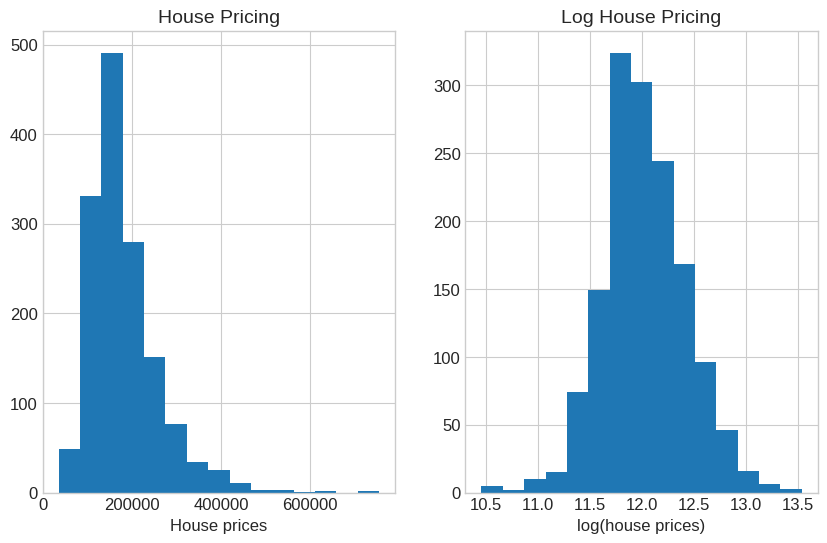

The normal pricing seems skewed, where as the log pricing seems like a normal distribution


In [124]:
# --------------------------------
# STUDENT SOLUTION START - Part 1a: Distribution Visualization
# --------------------------------
n = 15
fig, axs = plt.subplots(1, 2)

axs[0].hist(y, bins = n)
axs[0].set_xlabel("House prices")
axs[0].set_title("House Pricing")
axs[1].hist(np.log(y), bins = n)
axs[1].set_xlabel("log(house prices)")
axs[1].set_title("Log House Pricing")

plt.show()
print("The normal pricing seems skewed, where as the log pricing seems like a normal distribution")
# --------------------------------
# STUDENT SOLUTION END - Part 1a
# --------------------------------

### Part 1b: Statistical Distribution Analysis (10 points)

**Instructions:**
1. **Compute and compare distribution statistics**:
   - Calculate skewness and kurtosis for both raw and log-transformed prices
   - **Background**: Skewness measures asymmetry (0 = symmetric, >0 = right-skewed, <0 = left-skewed)
   - **Background**: Kurtosis measures tail heaviness (3 = normal distribution, >3 = heavy tails)
2. **Explain the benefits** of log-transformation for price prediction problems

Now quantify the distribution differences and explain the transformation benefits. Compute these statistics for both raw and log-transformed prices and compute the differences. Comment on the findings and comment on the potential benefits of log-transformation for modeling.

Feel free to use libraries like `scipy` to compute skewness and kurtosis.

In [125]:
# --------------------------------
# STUDENT SOLUTION START - Part 1b: Statistical Distribution Analysis
# --------------------------------

yskew = sp.stats.skew(y)
ykurt = sp.stats.kurtosis(y)

logy=np.log(y)

logyskew = sp.stats.skew(logy)
logykurt = sp.stats.kurtosis(logy)

print("Raw data skew = ",yskew)
print("Raw data kurtosis = ",ykurt)
print("Log data skew = ",logyskew)
print("Log data kurtosis = ",logykurt)
print()
print("We can see that the log transformation reduced the skewness, however it is still right-skewed.")
print("From measuring the kurtosis, the raw data has heavy tails where as the log transformed data is roughly normal.")

# --------------------------------
# STUDENT SOLUTION END - Part 1b
# --------------------------------

Raw data skew =  1.880940746034036
Raw data kurtosis =  6.509812011089439
Log data skew =  0.1212103673013655
Log data kurtosis =  0.8026555069117713

We can see that the log transformation reduced the skewness, however it is still right-skewed.
From measuring the kurtosis, the raw data has heavy tails where as the log transformed data is roughly normal.


### Part 1c: Data Preprocessing (10 points)

**Instructions:**
1. **Prepare the final dataset** for modeling by:
   - Selecting numerical features with <10% missing values
   - Handling missing values with median imputation. This means you replace the missing numeric values with the median values of the non-missing entries in that column.
   - Creating clean feature matrix and log-transformed target vector

**Expected Output:**
- Clean, preprocessed dataset ready for machine learning models

Now prepare the final cleaned dataset for modeling.

In [126]:
# --------------------------------
# STUDENT SOLUTION START - Part 1c: Data Preprocessing
# --------------------------------

## Some suggested steps to follow:
# Step 1: Use log-transformed target (better for modeling)

# Step 2: Analyze missing values in features

# Step 3: Select numerical columns with low missing value rates (<10%)

# Step 4: Handle remaining missing values with median imputation

# Step 5: Remove any samples with missing target values

# Get numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

Ximputed=X[numerical_cols]

# Perform median imputation for each numerical column
for col in numerical_cols:
    if Ximputed[col].isnull().any():
        median_value = Ximputed[col].median()
        Ximputed[col] = Ximputed[col].fillna(median_value)
        print(f"Imputed '{col}' with median: {median_value:.4f}")
# --------------------------------
# STUDENT SOLUTION END - Part 1c
# --------------------------------

Imputed 'LotFrontage' with median: 69.0000
Imputed 'MasVnrArea' with median: 0.0000
Imputed 'GarageYrBlt' with median: 1980.0000


## Part 2: Cross-Validation Model Comparison (70 points)

**Overview:** Compare three regression models using rigorous cross-validation methodology to understand their relative performance and characteristics. The cross-validation setup has been provided for you below.

**Tasks:**
- **Part 2a:** Model performance evaluation (35 points)
- **Part 2b:** Statistical comparison and analysis (35 points)

In [127]:
# --------------------------------
# CROSS-VALIDATION SETUP (PROVIDED) - No student action required
# --------------------------------

print("CROSS-VALIDATION MODEL COMPARISON SETUP")
print("=" * 50)

# Step 1: Configure cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
print(f"✓ Configured 10-fold cross-validation with shuffling")
print(f"  - Each model tested on 10 different train/test splits")
print(f"  - 90% training data, 10% testing data per fold")
print(f"  - Random shuffling ensures unbiased data distribution")

# Step 2: Define models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

print(f"\n✓ Defined {len(models)} models for comparison:")
print(f"  1. Linear Regression (OLS):")
print(f"     - Baseline linear model with low variance, potential high bias")
print(f"     - Fast training and prediction")
print(f"     - Assumes linear relationships")
print(f"  2. Decision Tree:")
print(f"     - Single tree, high variance, low bias potential")
print(f"     - Can capture non-linear relationships")
print(f"     - Prone to overfitting")
print(f"  3. Random Forest (100 trees):")
print(f"     - Ensemble method reduces variance via averaging")
print(f"     - Balances bias-variance tradeoff")
print(f"     - More robust to overfitting")

print(f"\nThe cross-validation setup is now complete.")
print(f"Proceed to Part 2a below to evaluate model performance.")

# --------------------------------
# CROSS-VALIDATION SETUP COMPLETE
# --------------------------------

CROSS-VALIDATION MODEL COMPARISON SETUP
✓ Configured 10-fold cross-validation with shuffling
  - Each model tested on 10 different train/test splits
  - 90% training data, 10% testing data per fold
  - Random shuffling ensures unbiased data distribution

✓ Defined 3 models for comparison:
  1. Linear Regression (OLS):
     - Baseline linear model with low variance, potential high bias
     - Fast training and prediction
     - Assumes linear relationships
  2. Decision Tree:
     - Single tree, high variance, low bias potential
     - Can capture non-linear relationships
     - Prone to overfitting
  3. Random Forest (100 trees):
     - Ensemble method reduces variance via averaging
     - Balances bias-variance tradeoff
     - More robust to overfitting

The cross-validation setup is now complete.
Proceed to Part 2a below to evaluate model performance.


The cross-validation framework has been automatically configured with three regression models: Linear Regression (baseline), Decision Tree (high variance), and Random Forest (balanced ensemble). The 10-fold cross-validation strategy will provide robust performance estimates for systematic model comparison.

### Part 2a: Model Performance Evaluation (35 points)

**Instructions:**
1. **Execute cross-validation** for each model systematically
2. **Compute R² scores** across all folds for each model
3. **Calculate summary statistics**: mean R², standard deviation
4. **Compute 95% confidence intervals** using t-distribution
   - **Background**: Confidence intervals quantify uncertainty in our performance estimates
   - **Formula**: CI = mean ± t_(α/2,df) × (std/√n), where t_(α/2,df) is the critical t-value

Now execute cross-validation for each model and compute comprehensive performance statistics with confidence intervals.

In [128]:
# --------------------------------
# STUDENT SOLUTION START - Part 2a: Model Performance Evaluation
# --------------------------------

print("EXECUTING CROSS-VALIDATION FOR EACH MODEL")
print("=" * 50)

# Initialize results storage
results = {}

# CRITICAL: Use the same CV splits for all models to enable paired t-tests
print("Using identical CV splits for all models to enable valid paired comparisons...")

# Pre-generate all CV splits to ensure identical folds across models
# use list(kfold.split(...)) to store the splits
cv_splits = list(kfold.split(Ximputed, np.log(y)))

# Evaluate each model using the SAME cross-validation splits
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Manually perform cross-validation using identical splits
    cv_scores = []
    for fold_idx, (train_idx, test_idx) in enumerate(cv_splits):
        # Extract train and test sets for this fold
        Xtrain_fold = Ximputed.iloc[train_idx]
        Xtest_fold = Ximputed.iloc[test_idx]
        ytrain_fold = np.log(y.iloc[train_idx])
        ytest_fold = np.log(y.iloc[test_idx])

        # Train model and predict
        reg = model.fit(Xtrain_fold, ytrain_fold)
        ypred = model.predict(Xtest_fold)

        # Calculate R² score for this fold
        cv_scores.append(r2_score(ytest_fold, ypred))


    # Calculate summary statistics
    mean_r2 = np.mean(cv_scores)
    std_r2 = np.std(cv_scores)

    # Calculate 95% confidence interval using t-distribution
    # can use stats.t.ppf for t-critical value
    # use k-1 degrees of freedom

    ci_lower = mean_r2-sp.stats.t.ppf(1-0.025,9)*std_r2/np.sqrt(10)
    ci_upper = mean_r2+sp.stats.t.ppf(1-0.025,9)*std_r2/np.sqrt(10)

    # Store comprehensive results
    results[model_name] = {
        'name': model_name,
        'mean_r2': mean_r2,
        'std_r2': std_r2,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'cv_scores': cv_scores
    }

    # Display results for current model
    print(f"  ✓ Cross-validation completed using identical splits")
    print(f"    Mean R² ± Std R²: {mean_r2:.4f} ± {std_r2:.4f}")
    print(f"    95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"    Fold scores: {[f'{score:.3f}' for score in cv_scores]}")

# --------------------------------
# STUDENT SOLUTION END - Part 2a
# --------------------------------

EXECUTING CROSS-VALIDATION FOR EACH MODEL
Using identical CV splits for all models to enable valid paired comparisons...

Evaluating Linear Regression...
  ✓ Cross-validation completed using identical splits
    Mean R² ± Std R²: 0.8340 ± 0.1200
    95% CI: [0.7482, 0.9199]
    Fold scores: ['0.911', '0.842', '0.872', '0.900', '0.779', '0.496', '0.879', '0.911', '0.834', '0.918']

Evaluating Decision Tree...
  ✓ Cross-validation completed using identical splits
    Mean R² ± Std R²: 0.7165 ± 0.0546
    95% CI: [0.6775, 0.7555]
    Fold scores: ['0.818', '0.717', '0.670', '0.761', '0.639', '0.687', '0.780', '0.724', '0.720', '0.650']

Evaluating Random Forest...
  ✓ Cross-validation completed using identical splits
    Mean R² ± Std R²: 0.8651 ± 0.0438
    95% CI: [0.8338, 0.8964]
    Fold scores: ['0.906', '0.841', '0.902', '0.893', '0.786', '0.802', '0.862', '0.881', '0.851', '0.929']


### Part 2b: Statistical Comparison and Analysis (35 points)

**Instructions:**
1. **Compute and Print** the following specific metrics for each model:
   - Model name
   - Mean R² score (4 decimal places)
   - Standard deviation of R² scores (4 decimal places)  
   - 95% confidence interval bounds [lower, upper] (4 decimal places)
   - Identify the best performing model by highest mean R²
2. **Perform paired t-tests** to determine statistical significance of differences. Compare the Random Forest regressor to the Decision Tree and Linear Regression models in turn.
   - **Note**: Paired t-tests are valid here because Part 2a used identical CV splits for all models
   - Each model was evaluated on the exact same train/test splits, making fold-wise comparisons meaningful
4. **Make recommendations** about which modeling approach works best based on performance and confidence intervals

In [129]:
# --------------------------------
# STUDENT SOLUTION START - Part 2b: Statistical Comparison and Analysis
# --------------------------------
for model in results:
  print(f"Model: {results[model]['name']}")
  print(f"  Mean R² ± Std R²: {results[model]['mean_r2']:.4f} ± {results[model]['std_r2']:.4f}")
  print(f"  95% CI: [{results[model]['ci_lower']:.4f}, {results[model]['ci_upper']:.4f}]")

print("By looking at the mean R² we see that the random forest is the best performing model")

# Compare Random Forest vs Decision Tree
rf_scores = np.array(results['Random Forest']['cv_scores'])
dt_scores = np.array(results['Decision Tree']['cv_scores'])

t_statistic_dt, p_value_dt = sp.stats.ttest_rel(rf_scores, dt_scores)
mean_diff_dt = np.mean(rf_scores - dt_scores)

print(f"\n1. Random Forest vs Decision Tree:")
print(f"   Mean difference (RF - DT): {mean_diff_dt:.4f}")
print(f"   T-statistic: {t_statistic_dt:.4f}")
print(f"   P-value: {p_value_dt:.4f}")

if p_value_dt < 0.05:
    print(f"    Statistically significant (p < 0.05)")
    if mean_diff_dt > 0:
        print(f"    Random Forest performs better than Decision Tree")
    else:
        print(f"    Random Forest performs worse than Decision Tree")
else:
    print(f"    Not statistically significant (p ≥ 0.05)")
    print(f"    No significant difference between Random Forest and Decision Tree")

# Compare Random Forest vs Linear Regression
lr_scores = np.array(results['Linear Regression']['cv_scores'])

t_statistic_lr, p_value_lr = sp.stats.ttest_rel(rf_scores, lr_scores)
mean_diff_lr = np.mean(rf_scores - lr_scores)

print(f"\n2. Random Forest vs Linear Regression:")
print(f"   Mean difference (RF - LR): {mean_diff_lr:.4f}")
print(f"   T-statistic: {t_statistic_lr:.4f}")
print(f"   P-value: {p_value_lr:.4f}")

if p_value_lr < 0.05:
    print(f"    Statistically significant (p < 0.05)")
    if mean_diff_lr > 0:
        print(f"    Random Forest performs better than Linear Regression")
    else:
        print(f"    Random Forest performs worse than Linear Regression")
else:
    print(f"    Not statistically significant (p ≥ 0.05)")
    print(f"    No significant difference between Random Forest and Linear Regression")

print("\nI would say that since Linear Regression is cheaper and not significantly different from the Random Forest that\n it would be better. The Random Forest did have a lower standard deviation though which gives a tighter CI.")
# --------------------------------
# STUDENT SOLUTION END - Part 2b
# --------------------------------

Model: Linear Regression
  Mean R² ± Std R²: 0.8340 ± 0.1200
  95% CI: [0.7482, 0.9199]
Model: Decision Tree
  Mean R² ± Std R²: 0.7165 ± 0.0546
  95% CI: [0.6775, 0.7555]
Model: Random Forest
  Mean R² ± Std R²: 0.8651 ± 0.0438
  95% CI: [0.8338, 0.8964]
By looking at the mean R² we see that the random forest is the best performing model

1. Random Forest vs Decision Tree:
   Mean difference (RF - DT): 0.1486
   T-statistic: 7.6133
   P-value: 0.0000
    Statistically significant (p < 0.05)
    Random Forest performs better than Decision Tree

2. Random Forest vs Linear Regression:
   Mean difference (RF - LR): 0.0310
   T-statistic: 1.0010
   P-value: 0.3430
    Not statistically significant (p ≥ 0.05)
    No significant difference between Random Forest and Linear Regression

I would say that since Linear Regression is cheaper and not significantly different from the Random Forest that
 it would be better. The Random Forest did have a lower standard deviation though which gives a tig